Chargement des données MNIST...
Données chargées avec succès.
Réduction de dimension avec PCA...
Réduction de dimension terminée.
Test pour k=2...
Test pour k=3...
Test pour k=4...
Test pour k=5...
Test pour k=6...
Test pour k=7...
Test pour k=8...
Test pour k=9...
Test pour k=10...


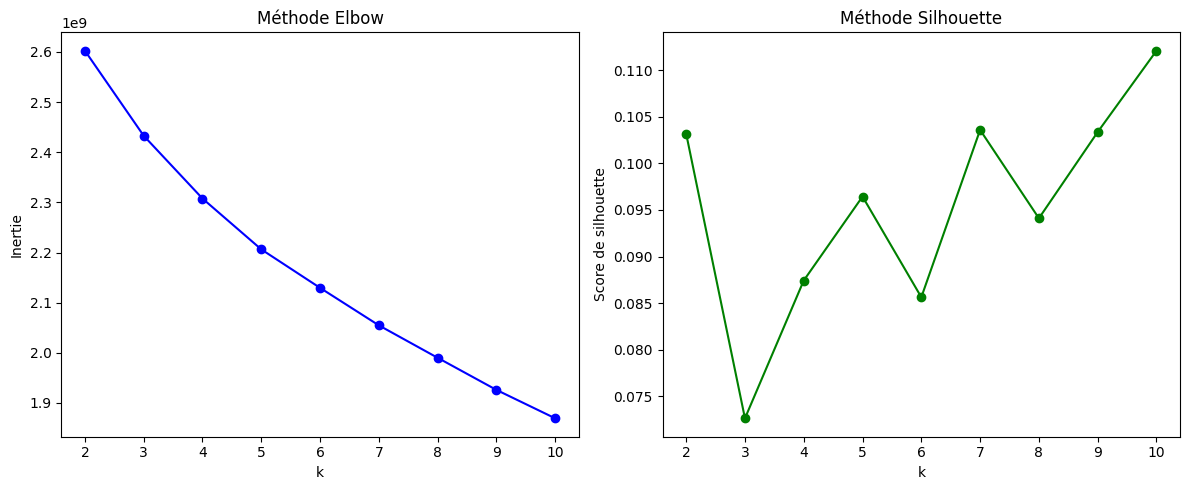

Affichage des graphiques terminé.
Clustering KMeans effectué.
Clustering HCA effectué.


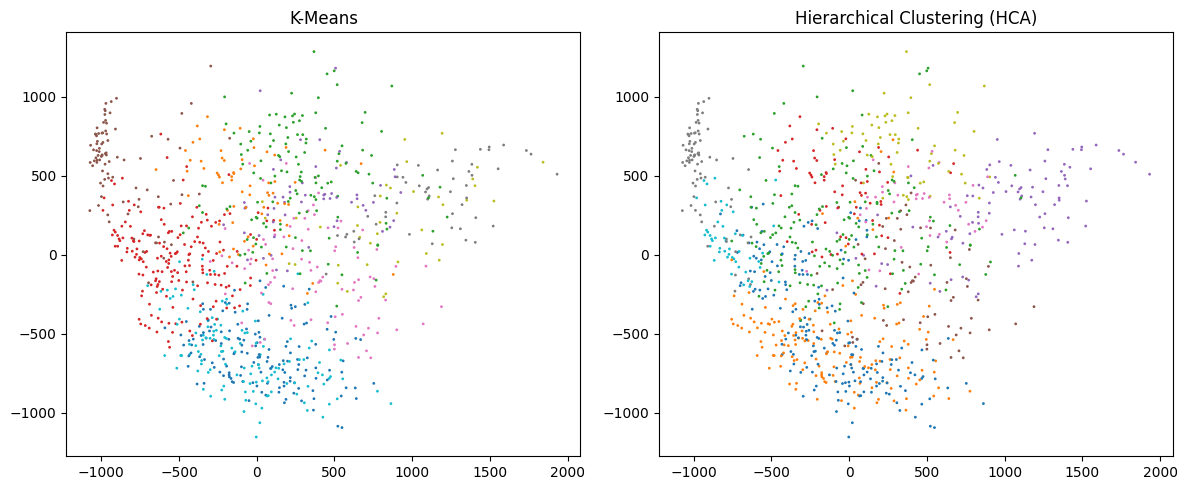

Affichage des résultats final terminé.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Charger les données MNIST
try:
    print("Chargement des données MNIST...")
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X = mnist.data
    print("Données chargées avec succès.")
except Exception as e:
    print(f"Erreur lors du chargement des données MNIST: {e}")

# Optionnel : Utiliser un sous-ensemble des données pour éviter des problèmes de mémoire
X_subset = X[:1000, :]  # Prenons seulement les 1000 premières images pour tester

# 2. Réduction de dimension avec PCA (50 composantes)
try:
    print("Réduction de dimension avec PCA...")
    pca = PCA(n_components=50)
    X_reduced = pca.fit_transform(X_subset)
    print("Réduction de dimension terminée.")
except Exception as e:
    print(f"Erreur lors de la réduction de dimension avec PCA: {e}")

# 3. Déterminer le meilleur k avec Elbow et Silhouette
inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    print(f"Test pour k={k}...")
    try:
        # KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=100, tol=1e-4)
        kmeans.fit(X_reduced)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(X_reduced, kmeans.labels_))
    except Exception as e:
        print(f"Erreur lors de l'exécution de KMeans pour k={k}: {e}")

# 4. Affichage des scores (Elbow et Silhouette)
try:
    plt.figure(figsize=(12, 5))

    # Elbow Method
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, marker='o', color='blue')
    plt.title("Méthode Elbow")
    plt.xlabel("k")
    plt.ylabel("Inertie")

    # Silhouette Method
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouettes, marker='o', color='green')
    plt.title("Méthode Silhouette")
    plt.xlabel("k")
    plt.ylabel("Score de silhouette")

    plt.tight_layout()
    plt.show()
    print("Affichage des graphiques terminé.")
except Exception as e:
    print(f"Erreur lors de l'affichage des graphiques: {e}")

# 5. Clustering final avec KMeans et HCA pour k=10 (ou selon meilleur k observé)
k_optimal = 10  # tu peux changer selon les résultats obtenus dans les graphiques

# KMeans
try:
    kmeans_final = KMeans(n_clusters=k_optimal, random_state=42, n_init=10, max_iter=100, tol=1e-4)
    kmeans_labels = kmeans_final.fit_predict(X_reduced)
    print("Clustering KMeans effectué.")
except Exception as e:
    print(f"Erreur lors de l'exécution de KMeans final: {e}")

# HCA
try:
    hca = AgglomerativeClustering(n_clusters=k_optimal)
    hca_labels = hca.fit_predict(X_reduced)
    print("Clustering HCA effectué.")
except Exception as e:
    print(f"Erreur lors de l'exécution de HCA: {e}")

# 6. Visualisation en 2D avec PCA (réduction à 2 composantes pour l'affichage)
try:
    pca_2d = PCA(n_components=2)
    X_vis = pca_2d.fit_transform(X_reduced)

    plt.figure(figsize=(12, 5))

    # Visualisation KMeans
    plt.subplot(1, 2, 1)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=kmeans_labels, cmap='tab10', s=1)
    plt.title("K-Means")

    # Visualisation HCA
    plt.subplot(1, 2, 2)
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=hca_labels, cmap='tab10', s=1)
    plt.title("Hierarchical Clustering (HCA)")

    plt.tight_layout()
    plt.show()
    print("Affichage des résultats final terminé.")
except Exception as e:
    print(f"Erreur lors de l'affichage des résultats: {e}")



Pour trouver la valeur optimale de K, nous pouvons utiliser deux méthodes : la méthode Elbow et la méthode Silhouette. La méthode Elbow consiste à tracer le score d'inertie en fonction du nombre de clusters et à choisir le nombre de clusters à l'endroit où le score d'inertie commence à diminuer de manière plus lente. La méthode Silhouette consiste à calculer le score de silhouette moyen en fonction du nombre de clusters et à choisir le nombre de clusters qui donne le score de silhouette maximal.


Méthode Elbow :
Pour trouver la valeur optimale de K, nous pouvons utiliser deux méthodes : la méthode Elbow et la méthode Silhouette. La méthode Elbow consiste à tracer le score d'inertie en fonction du nombre de clusters et à choisir le nombre de clusters à l'endroit où le score d'inertie commence à diminuer de manière plus lente. La méthode Silhouette consiste à calculer le score de silhouette moyen en fonction du nombre de clusters et à choisir le nombre de clusters qui donne le score de silhouette maximal.

Dans ce projet, nous avons appliqué des techniques de clustering non supervisé sur le jeu de données MNIST après une réduction de dimension via PCA. L'analyse des courbes Elbow et Silhouette a montré que le nombre optimal de clusters se situe autour de 10, ce qui correspond logiquement aux dix chiffres (0 à 9). Les algorithmes KMeans et Agglomerative Clustering ont permis de regrouper efficacement les images, et la visualisation en 2D a révélé des séparations globalement cohérentes entre les groupes. Malgré quelques limites liées au coût computationnel, cette approche confirme l'intérêt du prétraitement par PCA pour optimiser les performances de clustering sur des données de grande dimension.